# Python for Engineers Assignment 2018
Answer all questions.
<br>すべての質問に答えなさい。

Submission deadline 07/16 (July 16).
<br>提出締め切り07/16 (7月16日）。

Please submit your answer by email.
<br>どうぞ、メールによってあなたの答えを提出してください。

You may use the following file formats:
<br>あなたは以下のファイル形式を使ってもよい:
- .py
- .ipynb
- .txt

You may use multiple files.
<br>あなたは複数のファイルを使ってもよい。

You will be awarded points for:
あなたは以下のためのポイントを授与される：
- correct solution. 正しい答え。
- concise solution. 簡潔な答え。
- optimising your code by importing relevant library functions. 外部や基準のライブラリやパッケージを利用します。
- writing functions to avoid repetition. 重複を防ぐために関数（functions)を使いなさい。
- using comments to explain what your code does. あなたのコードを説明するために、コメントを用いる。

## Part A : Data Analysis　データ分析

#### Question 1
*(2 marks)*<br>
Import the data from the url to a Pandas data frame:
<br>`Pandas`を使って、以下urlからデータを読み込めよ
<br>https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user


In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
#Import the data
data = pd.read_csv(url, sep = '|')
#Check if I could import the data
print(data)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
10        11   39      F          other    30329
11        12   28      F          other    06405
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
14        15   49      F       educator    97301
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
17        18   35      F          other    37212
18        19   40      M      librarian    02138
19        20   42   

#### Question 2
*(2 marks)*<br>
Remove all entries with occupation `other` or `retired` from the data set.
<br>職業`occupation`の中に`other`と`retired`に関連するデータを取り除く。



In [2]:
A = data.index[(data.occupation == 'other')] 
B = data.index[(data.occupation == 'retired')]

data.drop(index = A.tolist() or B.tolist(),inplace = True)
print(data)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
2          3   23      M         writer    32067
3          4   24      M     technician    43537
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
14        15   49      F       educator    97301
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
18        19   40      M      librarian    02138
19        20   42      F      homemaker    95660
20        21   26      M         writer    30068
21        22   25      M         writer    40206
22        23   30      F         artist    48197
23        24   21      F         artist    94533
24        25   39   

#### Question 3
*(6 marks)*<br>
Plot a bar chart showing:
<br>棒グラフをプロットしなさい：
- the number of people per occupation for the 10 occupations that occur most frequently in the data set.
<br>取り除かない各職業の総人数を計算し、総人数最も多い10つの職業を取り出し、各職業の総人数を棒グラフで書きなさい。
- plot an additional bar, labelled other, showing the sum of all remaining entries in the data set.
<br>その以外の職業の人数をまとめて、`other`という名前を付け、同じ棒グラフに書きなさい。



     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
18        19   40      M      librarian    02138
19        20   42      F      homemaker    95660
22        23   30      F         artist    48197
24        25   39      M       engineer    55107
45        46   27      F      marketing    46538
56        57   16      M           none    84010
59        60   50      M     healthcare    06472
105      106   61      M        retired    55125
111      112   30   

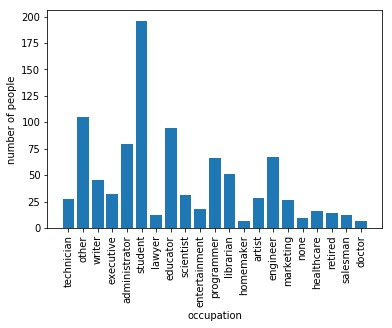

In [22]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
#Import the data
data = pd.read_csv(url, sep = '|')

sort_list = [];
A1 = data.drop_duplicates("occupation")
print(A1)
new_list = []
for raw in A1["occupation"]:
    A = len(data[data['occupation'] == raw]['occupation'])
    new_list.append(A)
print(new_list)


#B = np.array(new_list)
#C = np.array(A1["occupation"])
#print(C)
# Create an array with the position of each bar along the x-axis
#x_pos = np.arange(len(C))
# Produce bar plot
#plt.bar(x_pos, B);

# Replace the x ticks with the year group name
# Rotate labels 30 degrees
#plt.xticks(x_pos, C, rotation=90);
# Add axis labels 
#plt.xlabel('occupation');
#plt.ylabel('number of people');

#### Question 4
*(2 marks)*<br>
Find the:
- mean 
- standard deviaion 

of the age of people with the occupation: `administrator`.

<br>`administrator`という職業`occupation`の人達を見つけ出す。その人達の年齢の
- 平均値
- 標準偏差

を求めよ。

In [28]:
for raw in data["occupation"]:
    P = data[data['occupation'] == "administrator"]
print(P)

     user_id  age gender     occupation zip_code
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
33        34   38      F  administrator    42141
41        42   30      M  administrator    17870
47        48   45      M  administrator    12550
61        62   27      F  administrator    97214
71        72   48      F  administrator    73034
77        78   26      M  administrator    61801
78        79   39      F  administrator    03755
79        80   34      F  administrator    52241
85        86   26      M  administrator    46005
86        87   47      M  administrator    89503
88        89   43      F  administrator    68106
94        95   31      M  administrator    10707
117      118   21      M  administrator    90210
130      131   59      F  administrator    15237
150      151   38      F  administrator    48103
162      163   49      M  administrator    97212
173      174   30      F  administrator    52302
179      180   22   

## Part B : Movement of a Particle 粒子の動き

A particle moves along a curve.
<br>粒子がある軌跡を沿って移動する。

The cartesian coordinates of the position of the particle $(r_x, r_y)$ are: 
<br>粒子の位置$（r_x、r_y）$は時間$t$の変数である。その式は以下：

\begin{align}
r_x &= \exp \left( -\dfrac{t}{T_1} \right) 
\\
r_y &= 2 \cos \left(\dfrac{t}{T_2}\right)
\end{align}

$t$ = time (s)

Constants:　その中に、$T$は定数
<br>$T_1 = 1$ s 
<br>$T_2 = 1/3$ s. 

#### Question 1
*(8 marks)*

Plot the trajectory of the particle in the $xy$-plane over the time interval $t = 0$ to $t = 2\pi$ s. 
<br>時間$t=0$から$t=2\pi$までの粒子の軌跡を書きなさい。軌跡を表す点の数は任意。

On the graph, show the particle’s locations at $t = 0$, $\pi/2$ and $2\pi$ using:
<br>同じ図に、以下のものを使って、$t=0$、$t=\pi／2$と$t=2\pi$の粒子の位置を強調せよ：
- a marker 
- a label 



Text(0,0.5,'ry')

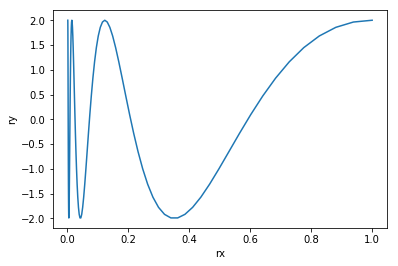

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
e = np.e
T1 = 1
T2 = 1/3
def rx(t):
    return e**(-t/T1)
def ry(t) :
    return 2*np.cos(t/T2)
tspan = np.linspace(0,2*np.pi,100)
plt.plot(rx(tspan),ry(tspan),label='the trajectory of the particle')
plt.xlabel('rx')
plt.ylabel('ry')


#### Question 2

The $x$ and $y$ components of the particle's acceleration $(a_x, a_y)$:
<br>粒子の加速度$（a_x、a_y）$はの粒子の位置$（r_x、r_y）$の二階微分である：

$$a_x=v_x'=r_x''$$
$$a_y=v_y'=r_y''$$ 

velocity $(v_x, v_y)$
<br>速度$(v_x, v_y)$

__(a)__ Express the particles acceleration $(a_x、a_y)$ symbolically, i.e. show the equation. 
<br>粒子加速度$（a_x、a_y）$を計算せよ。方程式を示す。
<br>*(5 marks)*<br>




In [6]:
from sympy import diff,symbols
rx, = symbols('a, b, c, x')
print(diff(rx(t), t, 2))

ValueError: too many values to unpack (expected 1)

__(b)__ Plot the *magnitude* of the acceleration of the particle against time over the time interval $t = 0$ to $t = 2\pi$ s.
<br>時間$t=0$から$t=2\pi$までの粒子の加速度の絶対値（マグニチュード加速度）を計算し、時間$t$に対する図を書きなさい。つまり、X軸は時間$t$、Y軸は加速度の絶対値。絶対値の式は以下
<br>*(5 marks)*<br>

The magnitude of acceleration, $A$:
$$A = \sqrt{a_x^2 + a_y^2}$$



#### Question 3
__(a)__
Find the magnitude velocity of the particle at time $ t = 1$s.
<br>$t=1$時刻の粒子の速度の絶対値（マグニチュード速度）を見つけ出す。
<br>*(5 marks)*<br>

__(b)__
Estimate the time/times when $r_y=0$
<br>$r_y=0$を満足する時間（時間達）を逆計算せよ。
<br>*(5 marks)*<br>

#### Question 4 
*(10 marks)*<br>
Animate the trajectory of the particle and save your work as a .mp4 file.
<br>粒子の移動軌跡をアニメーション化し、.mp4ファイルとして保存しなさい。